# Multi-Layer Perceptron

## Model Specification

Multi-Layer perceptron is a multi-layer generalization of the Rosenblatt’s perceptron. Rosenblatt's perceptron a variant of the McCulloch and Pitt neuron with a provably convergent learning rule, which is similar to gradient descent.

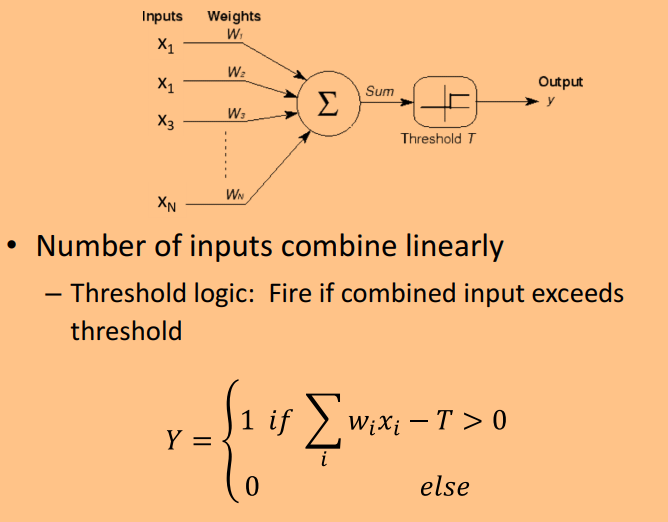

### Variants and Generalizations

* McCullough and Pitt model: Neurons as Boolean threshold units
    
    - Models the brain as performing propositional logic
    
    - But no learning rule

* Hebb’s learning rule: Neurons that fire together wire together, but it is unstable.
* Modern neural network models are essentially MLPs with different activation functions.
* ADALINE and MADALINE
* Wide and Deep neural net. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al. It connects all or part of the inputs directly to the output layer, as shown in Figure 10-14. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).17 In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

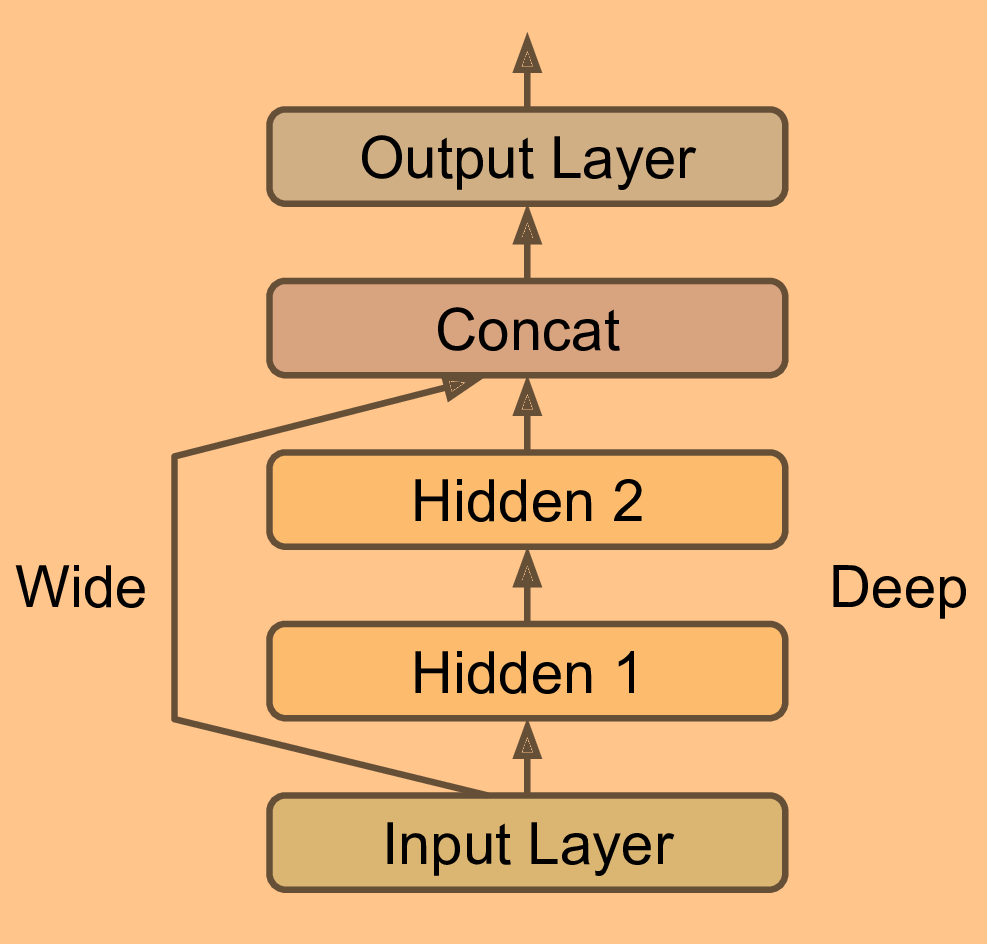

See the various optimization techniques and tricks in [efficient_deep_learning_and_optimization.ipynb](efficient_deep_learning_and_optimization.ipynb).

## Theoretical Properties

A bit of history

* Neural networks began as computational models of the brain
* Neural network models are connectionist machines
    - The comprise networks of neural units    
* McCullough and Pitt model: Neurons as Boolean threshold units
    - Models the brain as performing propositional logic
    - But no learning rule
* Hebb’s learning rule: Neurons that fire together wire together
    – Unstable

Rosenblatt's perceptron, or the individual form, can express 'and', 'not' and 'or', but not 'xor' (Minsky and Papert, 1968). But its multi-layer version, or MLP can be shown to be

* able to **model arbitrary boolean function**, with individual perceptron as Boolean gates.
    > Even network with a _single_ hidden layer is a universal Boolean machine, though it may require an exponentially large number of perceptrons. Getting deeper in the network can help reduce network size (number of neurons at each level, sometimes exponentially). But then it is shown that to approximate arbitrary functions, each layer still should have sufficient capacity so that information is not lost in the filtering. This can be somewhat alleviated by using not a threshold activation as defined by perceptron, but other activations such as ReLu or sigmoid to indicate how far the sample point is to the decision boundary, so that information is not lost. This intuition can be carried through in the cases where MLP is used as classifiers or to approximate other functions.
* universal classifier, where individual perceptrons as feature detectors, or correlation filters that fires when a pattern is recognized (i.e. have correlation so strong to trigger the activation).
* universal function approximator: 
  > It can be shown that this can be done even with just one-layer and infinite neurons. It first construct a 'cylinder' in the high-dimensional space. This is something that probably only have theoretical appeal.

The usual optimization technique for MLP is SGD. SGD converges “almost surely” to a global or local minimum for most
functions.

 > Sufficient condition: step sizes follow the following conditions: (1) $\sum_k\eta_k=\infty$ so that eventually the entire parameter spce can be searched; (2) $\sum_k\eta_k^2<\infty$, so that the steps shrink.
 > The fastest converging series that satisfies both above requirements is $\eta_k\approx\frac{1}{k}$, which is the optimal rate of shrinking the step size for strongly convex functions.
 > More generally, the learning rates are heuristically determined.

### Advantages and Disadvantages

* Disadvantages

    - Learning networks of threshold-activation perceptrons requires solving a hard combinatorial-optimization problem. Because we cannot compute the influence of small changes to the parameters on the overall error. That is why in modern neural network we use continuous activation functions with non-zero derivatives to enables us to estimate network parameters by running optimizations.
    - This is not necessarily a disadvantage, but perceptrons and MLPs are methods with low bias and high variance: very sensitive to outliers and any one of the training sample point. This is to be contrasted vs. neural networks with other different activation functions. More specifically, for neural network that has differentiable activation that backprop can work, it will often not find a separating solution **even though the solution is within the class of functions learnable by the network**.
    
* Advantages

    - Perceptrons can always train (albeit of an extrmely long time) to separate the classes, as long as the problem is linearly separable.

### Relation to Other Models

A special case of modern neural network. The modern neural network typically has **different activation functions**.

| Activation Function | Neurons dying and saturation for extreme input values, killing gradients | Computationaly Expensive |  Can generate negative output and gradient |
| - | - | - | - |
| sigmond | yes | relatively yes (exponential functions) | no |
| tanh | yes | no | yes |
| ReLu | yes | yes | no |
| Leaky Relu/Prelu (parametric ReLu)| no, but doubles the number of parameters | no | yes |
| maxout | no | no | no |
| softplus | no | yes | no |

Softplus activation function is like this: $\log(1+\exp(z))$, which is close to $0$ when $z$ is negative and close to $z$ when $z$ is positive.

And as mentioned above, different activation function can be essential for the performance of the network.

Contrary to logistic regression, perceptron does not output a class probability.

## Empirical Performance

There is anecdotal evidence that variance of neural network will decrease with depth. 

Also, it is a popular hypothesis that 
- In large networks, saddle points are far more common than local minima. This is probably because in large networks, there are more parameters and the search space is higher dimensional.
- Most local minima are equivalent. In fact, as mentioned above, number of neurons/number of layers increase model capacity, as well as the risk of over-fitting. But it is a bad idea to prevent over-fitting by restricting the number of neurons/layers, since local minimas of smaller networks tend to have larger losses than bigger networks. It is better to use other regularization methods, such as L1/L2, or dropouts.
- Those are not true for small networks.

### Advantages and Disadvantages

## Implementation Details and Practical Tricks



 - See the various optimization techniques and tricks in [efficient_deep_learning_and_optimization.ipynb](efficient_deep_learning_and_optimization.ipynb).
 
 `scikit-Learn`’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: `loss="perceptron"`, `learning_rate="constant"`, `eta0=1` (the learning rate), and `penalty=None` (no regularization).

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

Or it can be done via `keras`. Here is an example of MLP using the *declarative* approach where we are just building the graph but not yet passing the data or running the model. You can either use the sequential API or the functional API for this (in the example below we just show using the sequential API). There is also a more *imperative* approach; see [efficient_deep_learning_and_optimization.ipynb](efficient_deep_learning_and_optimization.ipynb).  

Specifying `activation="relu"` is equivalent to specifying `activation=keras.activations.relu`. Other activation functions are available in the `keras.activations` package; see https://keras.io/activations/ for the full list. Code examples documented on `keras.io` will work fine with `tf.keras`, but you need to change the imports

In [2]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

The model’s `summary()` method displays all the model’s layers,14 including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (`None` means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters.

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


A more intuitive demonstration of the model

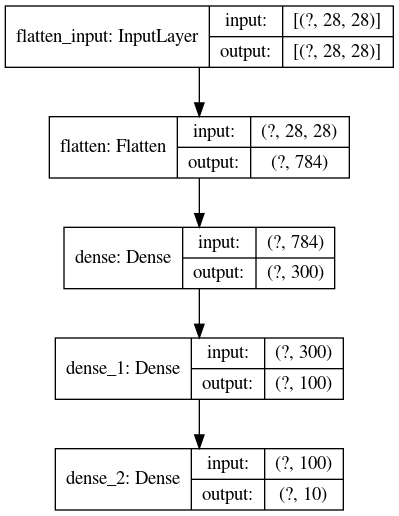

In [4]:
import pydot
import graphviz
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

## Use Cases

## Results Interpretation, Metrics and Visualization

## References

- CMU Deep Learning Course Fall 2019.
- Stanford 231n
- <Hands-on Machine Learning with Scikit-Learn, Keras>, and Tensorflow, 2nd Edition

### Further Reading

- CMU Deep Learning Course Fall 2019, Lecture 3 about ADALINE and MADALINE
- Heng-Tze Cheng et al., “Wide & Deep Learning for Recommender Systems,” Proceedings of the First Workshop on Deep Learning for Recommender Systems (2016): 7–10.


## Misc.